##Задания

**Задание 1.**

Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5.

In [2]:
# задано изначально
import numpy as np
import pandas as pd

r = np.random.RandomState(1)
s = pd.Series(r.uniform(0, 10, 100))

sorted_series = s.sort_values()
display(sorted_series)
print('\nИндекс: ', sorted_series[s > 5].index[0])

2     0.001144
98    0.028703
38    0.182883
50    0.193670
14    0.273876
        ...   
91    9.494893
32    9.578895
87    9.648400
21    9.682616
40    9.888611
Length: 100, dtype: float64


Индекс:  67


**Задание 2.**

Имеется небольшой игрушечный DataFrame, в котором необходимо провести несколько типов фильтраций и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:

* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [3]:
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])


# ваш код тут

# 1. Возраст > 40
sample = df[df['возраст'] > 40]
display(sample)

# 2. Доход > Доход.mean()
income_mean = df['доход'].mean()
sample = df[df['доход'] > income_mean]
display(sample)

# 3. Доход > Доход.mean() & Надежность < Надежность.mean()
reliability_mean = df['надежность клиента (0..1)'].mean()
sample = df[
    (df['доход'] > income_mean) & \
    (df['надежность клиента (0..1)'] < reliability_mean)
]
display(sample)

# 4. Добавление столбца 'важность клиента'
df['важность клиента'] = df['доход'] * df['надежность клиента (0..1)']
display(df)

# 5. Добавление столбца 'возможная долгосрочность клиента'
df['возможная долгосрочность клиента'] = df['важность клиента'] * (df['возраст'].mean() - df['возраст'])
display(df)


,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
2,Аня,41,150000,0.87,жен


,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
2,Аня,41,150000,0.87,жен


,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж


,имя,возраст,доход,надежность клиента (0..1),пол,важность клиента
0,Петя,45,100000,0.65,муж,65000.0
1,Вася,26,80000,0.74,муж,59200.0
2,Аня,41,150000,0.87,жен,130500.0
3,Света,21,60000,0.68,жен,40800.0


,имя,возраст,доход,надежность клиента (0..1),пол,важность клиента,возможная долгосрочность клиента
0,Петя,45,100000,0.65,муж,65000.0,-763750.0
1,Вася,26,80000,0.74,муж,59200.0,429200.0
2,Аня,41,150000,0.87,жен,130500.0,-1011375.0
3,Света,21,60000,0.68,жен,40800.0,499800.0


**Задание 3.**

Как объединить два DataFrame по двум столбцам так, чтобы остались только общие строки?

Объедините df1 и df2 по столбцам fruit-frukt и weight-ves.

In [4]:
df1 = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                    'weight': ['low', 'medium', 'high'] * 3,
                    'price': np.random.randint(0, 100, 9)})

df2 = pd.DataFrame({'frukt': ['apple', 'banana', 'melon'] * 2,
                    'ves': ['low', 'high'] * 3,
                    'price': np.random.randint(0, 100, 6)})

df = pd.merge(df1, df2, 
              how='inner', 
              left_on=['fruit', 'weight'], 
              right_on=['frukt', 'ves'],
              suffixes=['_df1', '_df2']
              )
display(df)

,fruit,weight,price_df1,frukt,ves,price_df2
0,apple,low,13,apple,low,44
1,apple,low,9,apple,low,44
2,apple,low,63,apple,low,44


**Задание 4.** 
Сгенерировать и добавить номера телефонов следующего вида +7(000)000 00 00 в таблицу



In [6]:
from random import randint

d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25},
     {"Name": "Алексей", "Age": 20}]

df = pd.DataFrame(d)

def get_phone_number():
  digits = ''.join([str(randint(0, 9)) for digit in range(10)])
  return '+7(%s)%s %s %s' % (digits[:3], digits[3:6], digits[6:8], digits[8:10])

df['Phone'] = [get_phone_number() for iter in range(len(df))]
display(df)

,Name,Age,Phone
0,Виктор,18,+7(523)448 88 14
1,Мария,21,+7(392)667 94 23
2,Иван,19,+7(266)939 00 77
3,Иван,25,+7(981)982 86 15
4,Алексей,20,+7(653)149 25 92


***Задание 1***

Скачать файл по ссылке https://disk.yandex.ru/d/ZeDbB3rqhIr1NA , считать через pandas. Получить список уникальных значений - стран в колонке "Country", отфильтровать и получить данные только по выпускникам колледжа. Убрать строки с пропусками в данных (NaN). (В случае ошибок типов можете конвертировать колонки к нужным типам через .astype(str) или .astype(int). Подсчитать макс значение, среднее и СКО для числа детей (household_children) в отфильтрованных данных.

In [8]:
df = pd.read_csv('/content/H1N1_Flu_Vaccines.csv', sep=',')
filtered = df[df['education'] == 'College Graduate'].dropna()
display(filtered)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
11,11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Own,Employed,oxchjgsf,Non-MSA,1.0,2.0,xicduogh,ccgxvspp,1.0,1.0
15,15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,3.0,wxleyezf,emcorrxb,0.0,0.0
22,22,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,fpwskwrf,"MSA, Not Principle City",2.0,1.0,wxleyezf,emcorrxb,0.0,0.0
34,34,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,2.0,wxleyezf,bxpfxfdn,1.0,1.0
47,47,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,Own,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,vjjrobsf,xtkaffoo,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4721,4721,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,0.0,arjwrbjb,mxkfnird,0.0,0.0
4728,4728,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,oxchjgsf,Non-MSA,1.0,1.0,xqicxuve,uqqtjvyb,0.0,1.0
4743,4743,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,fpwskwrf,"MSA, Principle City",1.0,0.0,arjwrbjb,hfxkjkmi,0.0,0.0
4745,4745,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,oxchjgsf,Non-MSA,1.0,0.0,wxleyezf,xtkaffoo,0.0,0.0


In [9]:
max_value = filtered['household_children'].max()
mean_value = filtered['household_children'].mean()
std_value = filtered['household_children'].std()

print(max_value, mean_value, std_value)

3.0 0.6577060931899642 0.9451965530389065


***Задание 2***

Скачать файл по ссылке https://disk.yandex.ru/i/uoN5eQE1qPCXCQ , считать через pandas второй лист (Olympics). Отфильтровать данные по России и золотым медалистам, построить график разброса возраст-вид_спорта. Построить линейный график на след данных - df.groupby('Year').Age.mean().dropna(). Сохранить графики в pdf. Отфильтровать изначальные данные только по летнему сезону, убрать колонку Город, создать колонку Год рождения, вычислить её через Возраст и Дату проведения, датафрейм сохранить вместе с графиками в архиве и скачать (командами, не через GUI).

In [15]:
excel_file = pd.ExcelFile('/content/Olympics 2018.xlsx')
olympics = excel_file.parse('Olympics')

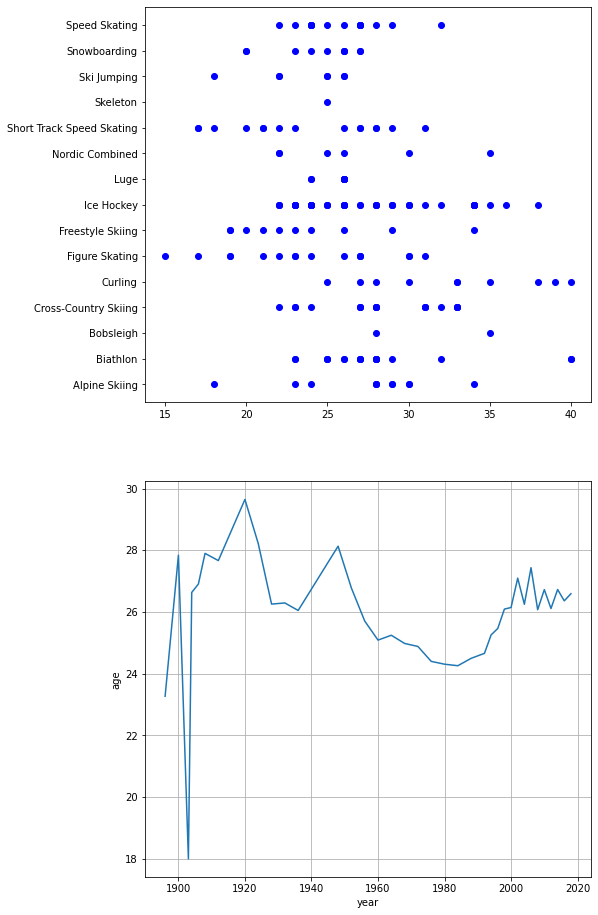

In [17]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

olympics_filt = olympics[(olympics['Medal'] == 'GOLD') & (olympics['Country'] == 'Russia')]

fig, ax = plt.subplots(2)
fig.set_figwidth(8)
fig.set_figheight(16)

ax[0].scatter(olympics_filt['Age'], olympics_filt['Sport'], c='blue')

linear_data = olympics.groupby('Year').Age.mean().dropna()
ax[1].set_xlabel('year')
ax[1].set_ylabel('age')
ax[1].grid()
ax[1].plot(linear_data)


plot_pdf = PdfPages('plots.pdf')
plot_pdf.savefig(plt.gcf())
plot_pdf.close()

In [18]:
filt_summer = olympics[olympics['Season'] == 'Summer'].drop(['City'], axis=1)
filt_summer['Birth Year'] = filt_summer['Year'] - filt_summer['Age']
filt_summer.to_csv('Data Frame.csv')

In [19]:
!zip -r '/content/plots_and_df.zip' '/content/Data Frame.csv' '/content/plots.pdf'

from google.colab import files
files.download('/content/plots_and_df.zip')

  adding: content/Data Frame.csv (deflated 82%)
  adding: content/plots.pdf (deflated 29%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>